# Personality Survey

https://vincentarelbundock.github.io/Rdatasets/datasets.html


This dataset contains personality self report items taken from the International Personality Item Pool (ipip.ori.org) were included as part of the Synthetic Aperture Personality Assessment (SAPA) web based personality assessment project.

The survey involved 2800 subjects who were asked questoins about themselves in which they were to respond on a scale of 1-6

The questions were in the below format;


| Column title | Question |
|:--------------|:----------------------|
|A1 | Am indifferent to the feelings of others. |
|A2 | Inquire about others' well-being.|
|A3 | Know how to comfort others.|
|A4 | Love children.|
|A5 | Make people feel at ease.|
|C1 | Am exacting in my work.|
|C2 | Continue until everything is perfect.|
|C3 | Do things according to a plan.|
|C4 | Do things in a half-way manner.|
|C5 | Waste my time.|
|E1 | Don't talk a lot.|
|E2 | Find it difficult to approach others.|
|E3 | Know how to captivate people.|
|E4 | Make friends easily.|
|E5 | Take charge.|
|N1 | Get angry easily.|
|N2 | Get irritated easily.|
|N3 | Have frequent mood swings.|
|N4 | Often feel blue.|
|N5 | Panic easily.|
|O1 | Am full of ideas.|
|O2 | Avoid difficult reading material.|
|O3 | Carry the conversation to a higher level.|
|O4 | Spend time reflecting on things.|
|O5 | Will not probe deeply into a subject.|
|:--------------|:----------------------|
|gender | Males = 1, Females =2 |
|education| 1 = HS, 2 = finished HS, 3 = some college, 4 = college graduate 5 = graduate degree|
|age | age in years|

    1.Load file
    2.Describe and have a sample view
    3.clean: Remove unwanted columns and blank rows****
    4.Conduct exploratory factor analysis
            *Evaluate factorability(Bartlett & KMO)
            *Extract factors (PCA)
            *Choose factors (Kaiser Criterion & Scree Plot)
            *Rotate factors
            *Interpret rotated factors

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import FactorAnalysis 
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/jupyterdata/bfi.csv',engine='python',encoding='latin1')

In [3]:
df.describe()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2800.000000,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,...,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000,2800.000000,2577.000000,2800.000000
mean,64599.238214,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,...,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568,1.671786,3.190144,28.782143
std,1728.527002,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,...,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959,0.469647,1.107714,11.127555
min,61617.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,63080.000000,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,20.000000
50%,64575.000000,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,...,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,66092.250000,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,...,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,35.000000
max,67560.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


In [4]:
column_names = list(pd.DataFrame(df))
print(column_names)

['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age']


I started with a correlation plot to see whether there are variables are useless or too correlated 

<AxesSubplot:>

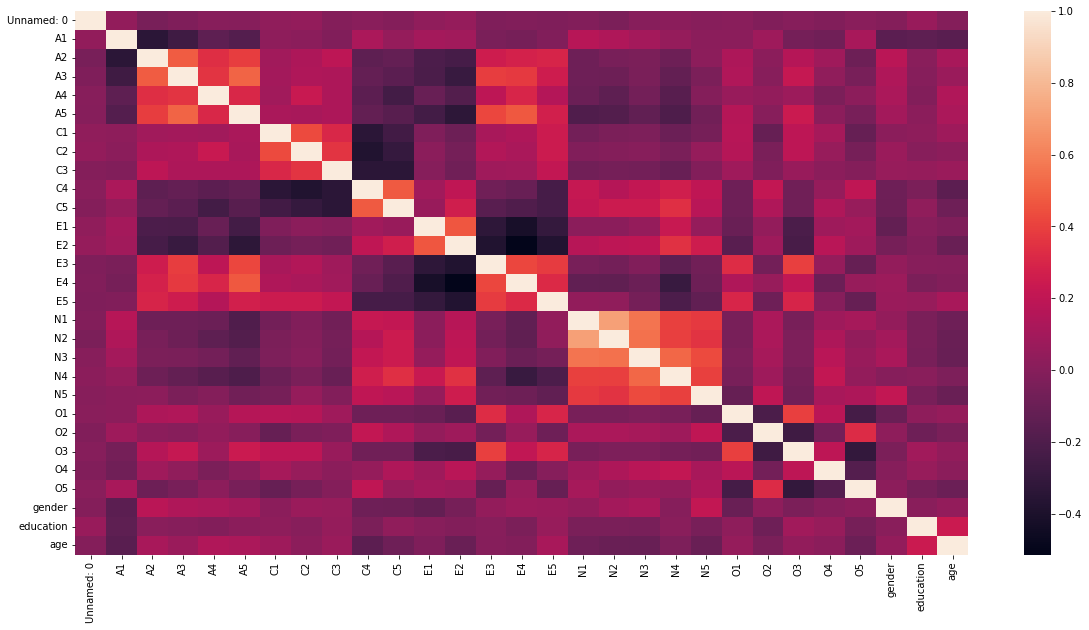

In [5]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)

**The result is that we see that the variables are highly correlated. This means that we are able to retain all of them.**

**However, as we are interested with the survey questions, I went ahead and removed the columns containing gender, education and age.**

**I will also remove the rows that contain null values as they cause errors when extracting factors**

In [6]:
df = pd.DataFrame(df)
df.drop(['gender','age','education'],axis=1,inplace=True)
df = df.dropna()
df

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,67547,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,...,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,67549,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,...,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


**The result is that we have now have 2453 rows which is still excellent for providing a stable factor solution**

The next step is now to check whether the data is appropriate for factorability.

I will evaluate for factorability using the Bartlett Sphericity test and Kaiser-Meyer-Olkin

In [7]:
#Barlett_sphericity Test

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)

chi_square_value, p_value

(18184.306307820767, 0.0)

In [8]:
#KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)

print("KMO Model\n", kmo_model)

KMO Model
 0.8483267027192372


**Bartlett's test resulted with a p-value of 0.0.
As this is lower than 0.05, it indicates that there is a sufficient correlation between the variables.**

**The KMO model places the proportion of variance at 0.85. This again is higher than 0.5 and indicates that more than 84% of the correlations between variables can be explained by other variables.**

**From the two tests, we can the proceed to reject the null hypothesis and proceed with factor analysis.**

*Extract the factors using Principal Component Analysis(PCA)*

In [9]:
#Extract Factors
factor = FactorAnalysis().fit(df)
Factors = pd.DataFrame(factor.components_)
print(Factors)

              0         1         2         3         4         5         6   \
0  -1.731735e+03 -0.063440  0.059877  0.020127 -0.016441 -0.004947 -0.053174   
1  -6.968202e-05  0.318012 -0.466994 -0.601336 -0.602177 -0.680060 -0.364279   
2  -1.482735e-04  0.065467 -0.413398 -0.499530 -0.332683 -0.359238 -0.207298   
3  -1.115358e-04  0.140189 -0.112062 -0.200890 -0.080086 -0.251615  0.565108   
4  -2.006035e-05 -0.080654  0.183144  0.191733  0.524749  0.113132  0.072587   
5   2.687676e-05  0.636833 -0.391981 -0.401891 -0.263963 -0.278852  0.032391   
6   5.098808e-05 -0.565952  0.167396 -0.011897  0.042667 -0.154409 -0.161491   
7  -1.695415e-05  0.063113 -0.138807 -0.213761 -0.160774 -0.033791  0.121932   
8  -3.072556e-05  0.215921 -0.137152  0.050648  0.406414  0.027571 -0.203140   
9   1.202714e-05 -0.131757 -0.014320  0.058675 -0.361485  0.064122 -0.015937   
10  1.518832e-05 -0.047469  0.024652  0.030119 -0.208721  0.050234 -0.184684   
11 -3.772230e-06  0.002574  0.042852  0.

**The first 18 rows have postive(+ve correlation) and negative(-ve correlation) values.**

**This output shows that there are 18 factors that have a significant correlation with original observables.**

*Choosing factors*
I use the Kaiser criterion to get eigen values

In [10]:
#Using Kaiser criterion to get eigen values
fa = FactorAnalyzer()
fa.analyze(df, 18, rotation = None)

#Check Eigen Values
ev, v = fa.get_eigenvalues()
print(ev)

#2nd method with updated version of FactorAnalyser
# fa =FactorAnalyzer(rotation=None)
# fa.fit(data, 5 )
# ev, v =fa.get_eigenvalues()
# print(ev)

    Original_Eigenvalues
0               5.134580
1               2.753375
2               2.148142
3               1.852506
4               1.548463
5               1.110662
6               0.980677
7               0.824309
8               0.795162
9               0.718290
10              0.686026
11              0.676149
12              0.651776
13              0.622974
14              0.596231
15              0.562446
16              0.543299
17              0.514340
18              0.494372
19              0.482639
20              0.448655
21              0.422806
22              0.400285
23              0.387738
24              0.381837
25              0.262263


Six values have ended up having an eigen value of more than 1.

These are the factors that will be used.

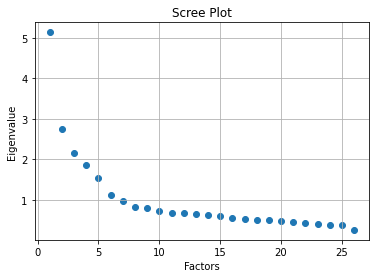

In [11]:
#Create scree plot using matplotlib & check shape
plt.scatter(range(1, df.shape[1]+1),ev)
#plt.plot(range(1, df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**The scree plot elbows out at the sixth value.**

**This confirms that we can only pick the first six values.**

*Rotating factors*
To improve interpretability.

In [12]:
#generate rotated factor matrix
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation = "varimax")
loading_matrix = fa.loadings
print(loading_matrix)

             Factor1   Factor2   Factor3   Factor4   Factor5   Factor6
Unnamed: 0 -0.032472 -0.022903  0.033169  0.003795 -0.038093  0.103748
A1          0.060474  0.099396  0.026694 -0.120309 -0.530785  0.163638
A2          0.259875  0.031767  0.140226  0.055770  0.646569 -0.097050
A3          0.408849 -0.005256  0.109534  0.016184  0.587004  0.039149
A4          0.255342 -0.079266  0.229308 -0.136293  0.391760  0.033401
A5          0.491049 -0.143645  0.085649  0.009111  0.451090  0.105888
C1          0.123647  0.005623  0.540150  0.183458  0.004221  0.138798
C2          0.106505  0.084358  0.652496  0.079203  0.056538  0.208580
C3          0.049796 -0.033946  0.545877 -0.012372  0.100286  0.054480
C4          0.008989  0.231617 -0.672785 -0.153451 -0.089980  0.226977
C5         -0.143644  0.293402 -0.559704  0.025614 -0.047070  0.095779
E1         -0.521477  0.053102  0.026492 -0.059281 -0.090545  0.332019
E2         -0.622923  0.263189 -0.110758 -0.030440 -0.074550  0.291204
E3    

Using a factor loading of 0.3 as the cut off, we observe the following;

| Factor | Items |
|:--------------|:----------------------|
|Factor 1 | A3,A5,E1,E2,E3,E4,E5,O3|
|Factor 2 | N1,N2,N3,N4,N5|
|Factor 3 | C1,C2,C3,C4,C5,E5|
|Factor 4 | O1,O2,O3,O4,O5,|
|Factor 5 | A1,A2,A3,A4,A5|
|Factor 6 | E1|

Since factor 6 has only one item with a loading higher than 0.3, we drop it.

Several items also appear under 2 factors(A3, A5, O3 and E5) so I move them under the factors with higher loadings and the result;

| Factor | Items |
|:--------------|:----------------------|
|Factor 1 | A5,E1,E2,E3,E4,E5|
|Factor 2 | N1,N2,N3,N4,N5|
|Factor 3 | C1,C2,C3,C4,C5|
|Factor 4 | O1,O2,O3,O4,O5,|
|Factor 5 | A1,A2,A3,A4,A5|


**Interpretation**

| Column title | Question |
|:--------------|:----------------------|
|A1 | Am indifferent to the feelings of others. |
|A2 | Inquire about others' well-being.|
|A3 | Know how to comfort others.|
|A4 | Love children.|
|A5 | Make people feel at ease.|
|C1 | Am exacting in my work.|
|C2 | Continue until everything is perfect.|
|C3 | Do things according to a plan.|
|C4 | Do things in a half-way manner.|
|C5 | Waste my time.|
|E1 | Don't talk a lot.|
|E2 | Find it difficult to approach others.|
|E3 | Know how to captivate people.|
|E4 | Make friends easily.|
|E5 | Take charge.|
|N1 | Get angry easily.|
|N2 | Get irritated easily.|
|N3 | Have frequent mood swings.|
|N4 | Often feel blue.|
|N5 | Panic easily.|
|O1 | Am full of ideas.|
|O2 | Avoid difficult reading material.|
|O3 | Carry the conversation to a higher level.|
|O4 | Spend time reflecting on things.|
|O5 | Will not probe deeply into a subject.|

Given the above, I gave the interpretations as follows;

| Factor | Title | Reason|
|:--------------|:----------------------|:--------------|
|Factor 1 | Intergration | Checks the ability to fit in with others|
|Factor 2 | Stability | Checks mental stability to external or internal stimuli|
|Factor 3 | Responsibility| How one handles given tasks|
|Factor 4 | Openness | Willingness to accept or probe opinions/ behaviour not one's own |
|Factor 5 | Empathy | Consideration for others|